<a href="https://colab.research.google.com/github/mlodashima/probspace/blob/main/probspace%E7%94%BB%E5%83%8F%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install,import

In [1]:
!pip install -q pytorch_lightning
!pip install -q torchmetrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision import datasets
import pytorch_lightning as pl
import torchmetrics
from torchmetrics.functional import accuracy, f1_score
import torchsummary
from torchsummary import summary
from pytorch_lightning.loggers import CSVLogger

from PIL import Image

# データ可視化、確認

In [2]:
test_data = np.load( '/content/drive/MyDrive/Probspace/test_data.npz')
train_data = np.load( '/content/drive/MyDrive/Probspace/train_data.npz')

In [3]:
print(train_data.files)

['arr_0', 'arr_1']


In [4]:
train_imgs = train_data['arr_0']
train_labels = train_data['arr_1']
"""
plt.figure(figsize=(25,25))
plt.subplot(151).imshow(train_imgs[0])
plt.subplot(152).imshow(train_imgs[1])
plt.subplot(153).imshow(train_imgs[2])
plt.subplot(154).imshow(train_imgs[3])
plt.subplot(155).imshow(train_imgs[4])
plt.show()
"""

'\nplt.figure(figsize=(25,25))\nplt.subplot(151).imshow(train_imgs[0])\nplt.subplot(152).imshow(train_imgs[1])\nplt.subplot(153).imshow(train_imgs[2])\nplt.subplot(154).imshow(train_imgs[3])\nplt.subplot(155).imshow(train_imgs[4])\nplt.show()\n'

# 前処理

In [5]:
""" 学習用データのフォルダを作成
import cv2
from PIL import Image
for i in range(len(train_imgs)):
    img = Image.fromarray(train_imgs[i])
    label = train_labels[i]
    if label == 0:
        if i < 10:
            img.save(f'/content/drive/MyDrive/Probspace/train/0/000{i}.png')
        elif i < 100:
            img.save(f'/content/drive/MyDrive/Probspace/train/0/00{i}.png')
        elif i < 1000:
            img.save(f'/content/drive/MyDrive/Probspace/train/0/0{i}.png')
        else:
            img.save(f'/content/drive/MyDrive/Probspace/train/0/{i}.png')

    elif label == 1:
        if i < 10:
            img.save(f'/content/drive/MyDrive/Probspace/train/1/000{i}.png')
        elif i < 100:
            img.save(f'/content/drive/MyDrive/Probspace/train/1/00{i}.png')
        elif i < 1000:
            img.save(f'/content/drive/MyDrive/Probspace/train/1/0{i}.png')
        else:
            img.save(f'/content/drive/MyDrive/Probspace/train/1/{i}.png')

    elif label == 2:
        if i < 10:
            img.save(f'/content/drive/MyDrive/Probspace/train/2/000{i}.png')
        elif i < 100:
            img.save(f'/content/drive/MyDrive/Probspace/train/2/00{i}.png')
        elif i < 1000:
            img.save(f'/content/drive/MyDrive/Probspace/train/2/0{i}.png')
        else:
            img.save(f'/content/drive/MyDrive/Probspace/train/2/{i}.png')

    elif label == 3:
        if i < 10:
            img.save(f'/content/drive/MyDrive/Probspace/train/3/000{i}.png')
        elif i < 100:
            img.save(f'/content/drive/MyDrive/Probspace/train/3/00{i}.png')
        elif i < 1000:
            img.save(f'/content/drive/MyDrive/Probspace/train/3/0{i}.png')
        else:
            img.save(f'/content/drive/MyDrive/Probspace/train/3/{i}.png')
"""

" 学習用データのフォルダを作成\nimport cv2\nfrom PIL import Image\nfor i in range(len(train_imgs)):\n    img = Image.fromarray(train_imgs[i])\n    label = train_labels[i]\n    if label == 0:\n        if i < 10:\n            img.save(f'/content/drive/MyDrive/Probspace/train/0/000{i}.png')\n        elif i < 100:\n            img.save(f'/content/drive/MyDrive/Probspace/train/0/00{i}.png')\n        elif i < 1000:\n            img.save(f'/content/drive/MyDrive/Probspace/train/0/0{i}.png')\n        else:\n            img.save(f'/content/drive/MyDrive/Probspace/train/0/{i}.png')\n\n    elif label == 1:\n        if i < 10:\n            img.save(f'/content/drive/MyDrive/Probspace/train/1/000{i}.png')\n        elif i < 100:\n            img.save(f'/content/drive/MyDrive/Probspace/train/1/00{i}.png')\n        elif i < 1000:\n            img.save(f'/content/drive/MyDrive/Probspace/train/1/0{i}.png')\n        else:\n            img.save(f'/content/drive/MyDrive/Probspace/train/1/{i}.png')\n\n    elif label == 2:

In [6]:
"""　サブミット用データのフォルダを作成
import cv2
from PIL import Image

test_data = np.load( '/content/drive/MyDrive/Probspace/test_data.npz')
test_imgs = test_data['arr_0']

for i in range(len(test_imgs)):
    img = Image.fromarray(test_imgs[i])
    if i < 10:
        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/000{i}.png')
    elif i < 100:
        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/00{i}.png')
    elif i < 1000:
        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/0{i}.png')
    else:
        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/{i}.png')
"""

"\u3000サブミット用データのフォルダを作成\nimport cv2\nfrom PIL import Image\n\ntest_data = np.load( '/content/drive/MyDrive/Probspace/test_data.npz')\ntest_imgs = test_data['arr_0']\n\nfor i in range(len(test_imgs)):\n    img = Image.fromarray(test_imgs[i])\n    if i < 10:\n        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/000{i}.png')\n    elif i < 100:\n        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/00{i}.png')\n    elif i < 1000:\n        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/0{i}.png')\n    else:\n        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/{i}.png')\n"

In [7]:
from torchvision import transforms, datasets

In [8]:
from torchvision.transforms.transforms import CenterCrop
# 前処理(ResNetに合わせる)
transform = transforms.Compose([
                    transforms.Resize(256),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [9]:
# アノテーション
dataset = datasets.ImageFolder('/content/drive/MyDrive/Probspace/train',transform)

In [10]:
dataset[0]

(tensor([[[ 1.6153,  1.5810,  1.5982,  ...,  1.6324,  2.0777,  2.0434],
          [ 1.6153,  1.5982,  1.5982,  ...,  1.5639,  2.0777,  2.0434],
          [ 1.5982,  1.6153,  1.6324,  ...,  1.6153,  2.1119,  2.0948],
          ...,
          [-0.4568, -0.4911, -0.5424,  ..., -0.4911, -0.3712, -0.3883],
          [-0.4739, -0.5082, -0.5082,  ..., -0.4568, -0.2856, -0.3369],
          [-0.4911, -0.5082, -0.4911,  ..., -0.4568, -0.2856, -0.3198]],
 
         [[ 1.5007,  1.5182,  1.5357,  ...,  1.6583,  2.1310,  2.1310],
          [ 1.5182,  1.5532,  1.5357,  ...,  1.6408,  2.1310,  2.1134],
          [ 1.5532,  1.5182,  1.5357,  ...,  1.6933,  2.1835,  2.1485],
          ...,
          [ 0.2752,  0.2752,  0.2927,  ..., -0.4951, -0.3375, -0.3200],
          [ 0.2402,  0.2402,  0.2927,  ..., -0.4951, -0.2850, -0.3025],
          [ 0.2577,  0.2402,  0.2577,  ..., -0.4951, -0.2850, -0.2850]],
 
         [[ 1.4374,  1.4025,  1.4200,  ...,  1.2282,  1.8383,  1.8383],
          [ 1.3677,  1.3851,

In [25]:
#データセット準備

pl.seed_everything(0)


#train val test分割
n_train = 5446
n_val = 1000

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [n_train, n_val], generator=torch.Generator().manual_seed(2013))

"""
# 層化抽出
from sklearn.model_selection import train_test_split
train_indices, val_indices = train_test_split(list(range(len(dataset.targets))), test_size=0.2, stratify=dataset.targets, random_state=2023)
train_dataset = torch.utils.data.Subset(dataset, train_indices)
val_dataset = torch.utils.data.Subset(dataset, val_indices)
"""



# DataLoaderを作成
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=True, num_workers=4)

#バッチサイズ定義
batch_size = 8

Global seed set to 0
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [27]:
len(train_dataset),len(val_dataset)

(5446, 1000)

# モデル作成、学習

In [28]:
from torchvision.models import resnet18

In [29]:
feature = resnet18(pretrained=False)

In [30]:
#挙動確認(1000出力, 重みの引継ぎありの場合)
#h = feature(train[0][0].unsqueeze(0))
#h.shape

In [31]:
#ネットワークの定義

class Net(pl.LightningModule):

    def __init__(self):
        super().__init__()

        self.feature = resnet18(pretrained=False)
        self.fc1 = nn.Linear(1000, 500)
        self.fc2 = nn.Linear(500,4)

    def forward(self, x):
        h = self.feature(x)
        h = self.fc1(h)
        h = self.fc2(h)
        return h

    def training_step (self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
        self.log('train_acc', accuracy(y.softmax(dim=1), t), on_step=True, on_epoch=True, prog_bar=True)
        tensorboard_logs = {'train_loss': loss}
        wandb.log({"loss": loss})
        return {'loss': loss, 'log': tensorboard_logs}


    def validation_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('val_loss', loss, on_step=False, on_epoch=True)
        self.log('val_acc', accuracy(y.softmax(dim=1), t), on_step=False, on_epoch=True)
        return {'val_loss': loss}
    
    def validation_end(self, outputs):
        # OPTIONAL
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        tensorboard_logs = {'val_loss': avg_loss}
        return {'avg_val_loss': avg_loss, 'log': tensorboard_logs}

    def test_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('test_loss', loss, on_step=False, on_epoch=True)
        self.log('test_acc', accuracy(y.softmax(dim=1), t), on_step=False, on_epoch=True)
        return {'test_loss': loss}

    def test_end(self, outputs):
        # OPTIONAL
        avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
        tensorboard_logs = {'test_loss': avg_loss}
        return {'avg_test_loss': avg_loss, 'log': tensorboard_logs}
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

In [32]:
import tensorflow as tf
import datetime

In [33]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [35]:
# Clear any logs from previous runs
!rm -rf ./tb_logs/ 

In [36]:
!pip install wandb
!wandb login

wandb: Currently logged in as: tsukumo. Use `wandb login --relogin` to force relogin


In [37]:
import wandb

wandb.init(project="resnet-18", entity="tsukumo")

wandb: Currently logged in as: tsukumo. Use `wandb login --relogin` to force relogin


In [38]:
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning import Trainer

wandb_logger = WandbLogger(project="resnet-18")

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/loggers/wandb.py:348: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  "There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse"


In [39]:
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 20,
  "batch_size": 8
}

In [40]:
# 学習の実行
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger

pl.seed_everything(0)
net = Net()
logger = TensorBoardLogger("tb_logs", name="my_model")
trainer = Trainer(logger=logger)
trainer = pl.Trainer(max_epochs=200, gpus=1, deterministic=False, logger=logger, callbacks=[EarlyStopping(monitor="val_loss", mode="min",patience=3)])
trainer.fit(net, train_data_loader, val_data_loader)

Global seed set to 0
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/loops/utilities.py:94: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  category=PossibleUserWarning,
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1815: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs/my_model
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type   | Params
-----------------------------------
0 | feature | ResNet | 11.7 M
1 | fc1     | Linear | 500 

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:490: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  category=PossibleUserWarning,
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [43]:
%tensorboard --logdir /content/tb_logs

Reusing TensorBoard on port 6006 (pid 6028), started 1:13:37 ago. (Use '!kill 6028' to kill it.)

<IPython.core.display.Javascript object>

# 学習済みモデル保存＆推論

In [44]:
# テストデータで検証
#results = trainer.test(model=net ,dataloaders = test_loader)

In [45]:
#学習済みモデルの保存
torch.save(net.state_dict(), 'random_split_model.pt')

In [46]:
# モデルの型を読み込んで推論モード
net = Net().cpu().eval()

In [48]:
# 重みのロード
net.load_state_dict(torch.load('/content/random_split_model.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [49]:
# サブミット用データにも同じ前処理
test_pre = datasets.ImageFolder('/content/drive/MyDrive/Probspace/testdata',transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show>

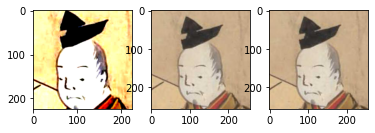

In [50]:
# 前処理したデータ、元ファイル、アノテーションフォルダの画像番号が一致しているか
img = test_pre[1][0].permute(1, 2, 0).numpy()
img3 = Image.open('/content/drive/MyDrive/Probspace/testdata/test/0001.png')
plt.subplot(131).imshow(img)
plt.subplot(132).imshow(test_data['arr_0'][1])
plt.subplot(133).imshow(img3)
plt.show

In [51]:
# 1枚だけ予測してみる
# 予測値の算出
y = net(test_pre[1][0].unsqueeze(0))
# 確率に変換
y = F.softmax(y)
# 予測ラベル
y = torch.argmax(y)
print(int(y))

1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


In [52]:
from tqdm.notebook import tqdm

In [53]:
pred = []
for i in tqdm(range(len(test_pre))):
   y = net(test_pre[i][0].unsqueeze(0))
   y = F.softmax(y)
   y = torch.argmax(y)
   pred.append(int(y))

  0%|          | 0/2000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


In [54]:
# サブミットファイル作成
submit_data = pd.read_csv('/content/drive/MyDrive/Probspace/submission_sample.csv')
submit_data['y'] = pred
submit_data.to_csv('submission.csv', index=False)

In [55]:
# 予測ラベル確認
pd.DataFrame(submit_data)['y'].value_counts()

0    1019
1     681
2     165
3     135
Name: y, dtype: int64

(array([1019.,    0.,    0.,  681.,    0.,    0.,  165.,    0.,    0.,
         135.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

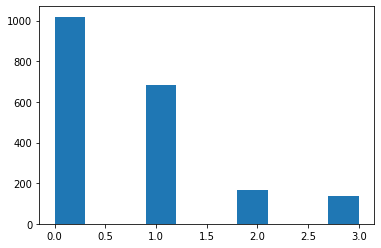

In [56]:
plt.hist(pd.DataFrame(submit_data)['y'])